In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import csv

# Préparation des données


In [2]:
aalim=pd.read_csv(r"C:\Users\piard\OneDrive\Documents\Projet 4\DAN-P4-FAO\aide_alimentaire.csv")

In [3]:
pop=pd.read_csv(r"C:\Users\piard\OneDrive\Documents\Projet 4\DAN-P4-FAO\population.csv")

In [4]:
pop.shape


(1416, 3)

In [5]:
pop2017=pop[pop['Année']==2017]

NumExpr defaulting to 8 threads.


In [6]:
sn=pd.read_csv(r"C:\Users\piard\OneDrive\Documents\Projet 4\DAN-P4-FAO\sous_nutrition.csv")

In [7]:
snp=pd.read_csv(r"C:\Users\piard\OneDrive\Documents\Projet 4\DAN-P4-FAO\sous_nutrition.csv")

In [8]:
sn.shape

(1218, 3)

In [9]:
#Supprime les lignes contenant les valeurs <0.1
sn=sn[sn['Valeur']!='<0.1']

In [10]:
#Remplace les valeurs <0.1 par 0.1
snp=snp.replace(['<0.1'],0.1)

In [11]:
# Changement des valeurs dans la colonne année du dataset sous nutrition
sn['Année']=sn['Année'].map({'2012-2014':'2013','2013-2015':'2014','2014-2016':'2015','2015-2017':'2016','2016-2018':'2017','2017-2019':'2018'})

In [12]:
#Population en sous nutrition pour l'année 2017
sn2017=sn[sn['Année']=='2017']

In [13]:
snp['Année']=snp['Année'].map({'2012-2014':'2013','2013-2015':'2014','2014-2016':'2015','2015-2017':'2016','2016-2018':'2017','2017-2019':'2018'})

In [14]:
snp2017=snp[snp['Année']=='2017']

In [15]:
da=pd.read_csv(r"C:\Users\piard\OneDrive\Documents\Projet 4\DAN-P4-FAO\dispo_alimentaire.csv")

In [16]:
da.describe()

,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
count,2720.000000,5496.000000,14241.000000,14015.000000,11794.000000,11561.000000,15382.000000,12226.000000,14852.000000,14015.000000,4278.000000,9180.000000,2091.000000,2292.000000,6776.000000
mean,479.501838,157.391376,34.789832,8.719368,1.283111,1.223608,640.293460,110.596925,87.264543,347.931359,106.053763,1090.379085,73.974653,961.905323,-15.407615
std,4240.119637,5076.785816,107.287655,24.618223,3.680399,3.598686,9067.267153,1053.318990,717.372714,4475.704458,1113.100416,12067.344094,528.069224,10381.795904,549.834540
min,0.000000,0.000000,-21.000000,-1.930000,-0.030000,-0.370000,-3430.000000,-41.000000,-201.000000,-246.000000,0.000000,0.000000,0.000000,-19.000000,-39863.000000
25%,0.000000,0.000000,0.000000,0.060000,0.010000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,4.000000,0.830000,0.080000,0.100000,7.000000,0.000000,2.000000,5.000000,4.000000,22.000000,2.000000,6.000000,0.000000
75%,74.000000,4.000000,21.000000,5.190000,0.630000,0.660000,76.750000,9.000000,18.000000,52.000000,26.000000,191.250000,17.000000,69.000000,0.000000
max,150000.000000,347309.000000,1711.000000,430.760000,60.760000,54.970000,739267.000000,42797.000000,63381.000000,426850.000000,55047.000000,739267.000000,17060.000000,326711.000000,5284.000000


In [17]:
da=da.fillna(0)

In [18]:
#Remplace les disponibilités intérieures négatives par la première équation de l'item 10
da['Disponibilité intérieure'].mask(da['Disponibilité intérieure']<0,
da['Aliments pour animaux']+da['Autres Utilisations']+da['Nourriture']+da['Pertes']+da['Semences']+da['Traitement'],inplace=True)

In [19]:
da.iloc[[7029]]

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
7029,Japon,Avoine,vegetale,50.0,1.0,-21.0,-1.93,-0.03,-0.37,-160.0,-41.0,-201.0,-246.0,0.0,0.0,0.0,35.0,0.0


In [20]:
da.drop(7029,0,inplace=True)

In [21]:
cereales=pd.read_csv(r"C:\Users\piard\OneDrive\Documents\Projet 4\cereales_17.csv",sep=',')

In [22]:
cereales=cereales[~cereales['Zone'].str.contains('Chine - RAS de Macao')][['Domaine','Zone', 'Élément', 'Produit' ,'Année' ,'Unité', 'Valeur']]

In [23]:
cereales=cereales[~cereales['Zone'].str.contains('Chine, Taiwan Province de')][['Domaine','Zone', 'Élément', 'Produit' ,'Année' ,'Unité', 'Valeur']]

In [24]:
cereales=cereales[~cereales['Zone'].str.contains('Chine - RAS de Hong-Kong')][['Domaine','Zone', 'Élément', 'Produit' ,'Année' ,'Unité', 'Valeur']]

In [25]:
cereales=cereales[~cereales['Zone'].str.contains('Chine, continentale')][['Domaine','Zone', 'Élément', 'Produit' ,'Année' ,'Unité', 'Valeur']]

# Proportions de valeurs manquantes

In [26]:
(pd.read_csv(r"C:\Users\piard\OneDrive\Documents\Projet 4\DAN-P4-FAO\dispo_alimentaire.csv").isna().sum()
/pd.read_csv(r"C:\Users\piard\OneDrive\Documents\Projet 4\DAN-P4-FAO\dispo_alimentaire.csv").shape[0]).sort_values(ascending=True)

Zone                                                             0.000000
Produit                                                          0.000000
Origine                                                          0.000000
Disponibilité intérieure                                         0.014290
Importations - Quantité                                          0.048254
Disponibilité alimentaire (Kcal/personne/jour)                   0.087408
Nourriture                                                       0.101890
Disponibilité alimentaire en quantité (kg/personne/an)           0.101890
Exportations - Quantité                                          0.216533
Disponibilité de matière grasse en quantité (g/personne/jour)    0.244217
Disponibilité de protéines en quantité (g/personne/jour)         0.259148
Production                                                       0.411727
Variation de stock                                               0.565780
Autres Utilisations                   

In [27]:
(sn.isna().sum()/sn.shape[0]).sort_values(ascending=True)

Zone      0.000000
Année     0.000000
Valeur    0.540984
dtype: float64

In [28]:
(pop.isna().sum()/pop.shape[0]).sort_values(ascending=True)

Zone      0.0
Année     0.0
Valeur    0.0
dtype: float64

In [29]:
(aalim.isna().sum()/aalim.shape[0]).sort_values(ascending=True)

Pays bénéficiaire    0.0
Année                0.0
Produit              0.0
Valeur               0.0
dtype: float64

In [30]:
(cereales.isna().sum()/cereales.shape[0]).sort_values(ascending=True)

Domaine    0.0
Zone       0.0
Élément    0.0
Produit    0.0
Année      0.0
Unité      0.0
Valeur     0.0
dtype: float64

# Recherche de la proportion de la population en sous-nutrition

In [31]:
sn2017['Valeur'].astype(float).sum()*1000000

535699999.99999994

In [32]:
(sn2017['Valeur'].astype(float).sum()*1000000/(pop2017.Valeur.sum()*1000))*100

7.097118203283072

- Il y a environ 536 millions de personnes en sous-nutrition.
- La proportion de la population mondiale en sous-nutrition est d'environ 7.1%.

In [33]:
snp2017['Valeur'].astype(float).sum()*1000000

537700000.0

In [34]:
(snp2017['Valeur'].astype(float).sum()*1000000/(pop2017.Valeur.sum()*1000))*100

7.1236148178183845

  En remplaçant les valeurs '<0.1' par 0.1:
- Il y a environ 538 millions de personnes en sous-nutrition.
- La proportion de la population mondiale en sous-nutrition est d'environ 7.1%.


# Recherche du Top 3 des pays ayant les plus grosses disponibilité alimentaire 

In [35]:
dal=da.groupby(['Zone']).sum().reset_index().drop(columns=['Aliments pour animaux','Autres Utilisations','Disponibilité alimentaire en quantité (kg/personne/an)','Disponibilité de matière grasse en quantité (g/personne/jour)','Disponibilité de protéines en quantité (g/personne/jour)','Disponibilité intérieure','Exportations - Quantité','Importations - Quantité','Nourriture','Pertes','Production','Semences','Traitement','Variation de stock'])

In [36]:
top3da=dal[dal['Disponibilité alimentaire (Kcal/personne/jour)']>3700]

In [37]:
top3da

,Zone,Disponibilité alimentaire (Kcal/personne/jour)
11,Autriche,3770.0
16,Belgique,3737.0
159,Turquie,3708.0


# Recherche des trois pays ayant les plus faibles disponibilité alimentaire

In [38]:
daf3=dal[dal['Disponibilité alimentaire (Kcal/personne/jour)']<2060]

In [39]:
daf3.sort_values(by='Disponibilité alimentaire (Kcal/personne/jour)',ascending=True)

,Zone,Disponibilité alimentaire (Kcal/personne/jour)
128,République centrafricaine,1879.0
166,Zambie,1924.0
91,Madagascar,2056.0


# Recherche des pays ayant une disponibilité alimentaire inférieure à 2000 

In [40]:
dal[dal['Disponibilité alimentaire (Kcal/personne/jour)']<2000]

,Zone,Disponibilité alimentaire (Kcal/personne/jour)
128,République centrafricaine,1879.0
166,Zambie,1924.0


# Recherche des pays ayant une disponibilité alimentaire située entre 2000 et 2299 kcal/personne/jour

In [41]:
dal[(dal['Disponibilité alimentaire (Kcal/personne/jour)'] > 2000) & (dal['Disponibilité alimentaire (Kcal/personne/jour)'] < 2300)]

,Zone,Disponibilité alimentaire (Kcal/personne/jour)
0,Afghanistan,2087.0
19,Bolivie (État plurinational de),2250.0
39,Congo,2206.0
62,Guinée-Bissau,2288.0
65,Haïti,2089.0
...,...,...
151,Tchad,2109.0
154,Timor-Leste,2129.0
165,Yémen,2217.0
167,Zimbabwe,2113.0


In [42]:
dal[(dal['Disponibilité alimentaire (Kcal/personne/jour)'] > 2000) & (dal['Disponibilité alimentaire (Kcal/personne/jour)'] < 2300)].shape

(20, 2)

Il y a 20 pays.

# Recherche de 10 pays ayant une proportion importante de sa population en sous-nutrition

In [43]:
snp2017=sn2017.merge(pop2017,left_on='Zone',right_on='Zone')

In [44]:
snp2017.columns=['Pays','Année','Popsn en %','Année1','Pop']

In [45]:
sous_nutri=snp2017['Popsn en %'].astype(float)*1000000/(snp2017['Pop']*1000)*100

In [46]:
sous_nutr=pd.concat([snp2017,sous_nutri],axis=1)

In [47]:
sous_nutr.columns=['Pays','Année','Popsn','Année1','Pop','Propsn en %']

In [48]:
sous_nutr=sous_nutr.drop(columns=['Année1'])

In [49]:
sous_nutr.sort_values(by=['Propsn en %'],ascending=False).head(10).drop(columns=['Année','Popsn','Pop'])

,Pays,Propsn en %
69,Haïti,48.259182
142,République populaire démocratique de Corée,47.188685
96,Madagascar,41.062924
92,Libéria,38.279742
89,Lesotho,38.249438
165,Tchad,37.957606
146,Rwanda,35.055619
108,Mozambique,32.810898
168,Timor-Leste,32.173531
0,Afghanistan,28.928718


# Recherche de l'équation de la disponibilité intérieure

In [50]:
daBle=da[(da['Zone']=='Autriche')&(da['Produit']=='Blé')]

In [51]:
(daBle['Aliments pour animaux'] + daBle['Autres Utilisations']+daBle['Nourriture']+daBle['Pertes']+daBle['Semences']+daBle['Traitement']).sum()

1320.0

In [52]:
daBle['Disponibilité intérieure'].sum()

1320.0

In [53]:
(daBle['Production']-daBle['Exportations - Quantité']+daBle['Importations - Quantité']+daBle['Variation de stock']).sum()

1320.0

Je remarque que :
- Disponibilité intérieure = Aliments pour animaux + Autres Utilisations + Nourriture + Pertes + Semences + Traitement

- Disponibilité intérieure = Production - Exportations + Importations + Variations de stock

# Recherche des proportions liées à la disponibilité intérieure

In [54]:
dint=da.groupby(['Zone']).sum()

In [55]:
liste=['Aliments pour animaux','Autres Utilisations','Nourriture','Pertes','Semences','Traitement','Disponibilité intérieure']
dint1=dint[liste].sum()

In [56]:
for c in liste : print('%s: %f' % (c,dint1[c]/dint1.iloc[6]*100)+ '%')

Aliments pour animaux: 13.233684%
Autres Utilisations: 8.777389%
Nourriture: 49.481949%
Pertes: 4.603679%
Semences: 1.569550%
Traitement: 22.370632%
Disponibilité intérieure: 100.000000%


- Part attribué à l'alimentation animale : 13.2%

- Part attribué à l'alimentation humaine : 49.5%

- Part attribué aux pertes: 4.6%

In [57]:
l=[13.233684,8.777389,49.481949,4.603679,1.569550,22.370632]
eti=['Aliments pour animaux','Autres Utilisations','Nourriture','Pertes','Semences','Traitement']

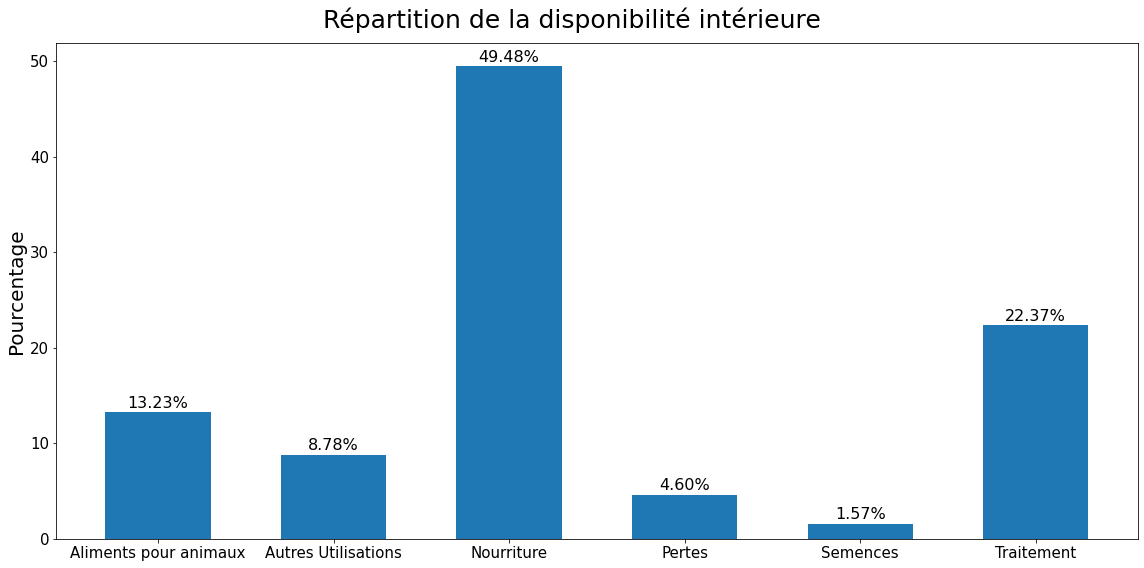

In [58]:
fig,ax=plt.subplots(figsize=(16,8))
ax.bar(eti,l,width=0.6)
plt.suptitle('Répartition de la disponibilité intérieure',fontsize=25)
plt.ylabel('Pourcentage',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

for index,data in enumerate(l):
    plt.text(x=index , y =data+0.5 , s=f"{data:.2f}%" , fontdict=dict(fontsize=16),ha='center')
    plt.tight_layout()
plt.show()

# Recherche des proportions pour les céréales

In [59]:
cereales.shape

(19077, 7)

In [60]:
cereales1=cereales.groupby(['Élément']).sum().drop(columns=['Année']).reset_index()

In [61]:
sequence=[0.452037,0.331764]
etiquettes=['Nourriture','Aliments pour animaux']

In [62]:
for d in etiquettes:
     print('%s:%f' %(d,cereales1[cereales1['Élément']== d].sum().Valeur /(cereales1[cereales1['Élément']=='Disponibilité intérieure'].sum().Valeur)*100)+'%')

Nourriture:45.203697%
Aliments pour animaux:33.176438%


Les céreales sont utilisés à 33% pour les animaux et 45% pour les humains.

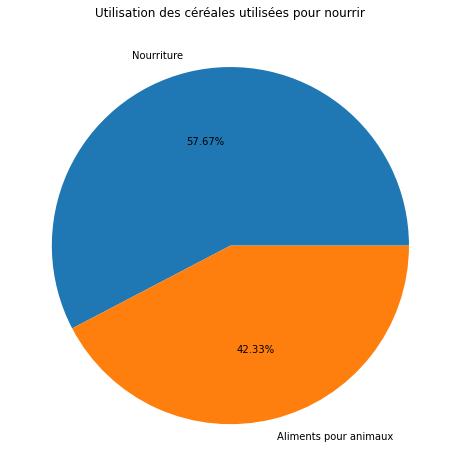

In [63]:
plt.figure(figsize = (8,10))
plot = plt.pie(
    sequence, 
    labels=etiquettes, autopct=lambda x:str(round(x, 2)) + '%',normalize=True)
plot = plt.title('Utilisation des céréales utilisées pour nourrir')

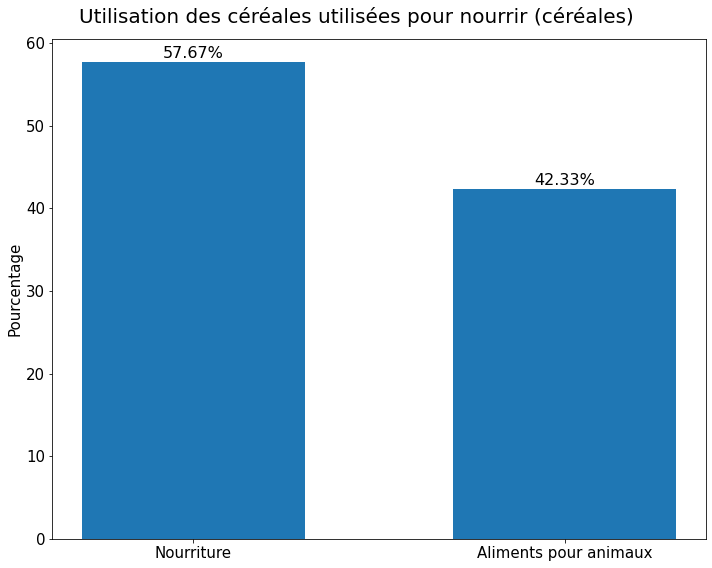

In [64]:
sequences=[0.5767*100,0.4233*100]
fig,ax=plt.subplots(figsize=(10,8))
ax.bar(etiquettes,sequences,width=0.6)
plt.suptitle('Utilisation des céréales utilisées pour nourrir (céréales)',fontsize=20)
plt.ylabel('Pourcentage',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

for index,data in enumerate(sequences):
    plt.text(x=index , y =data+0.5 , s=f"{data:.2f}%" , fontdict=dict(fontsize=16),ha='center')
    plt.tight_layout()
plt.show()

In [65]:
Liste=[0.331764*100,0.452037*100,0.102933*100,0.049986*100,0.028233*100,0.037491*100]
etiquette=['Aliments pour animaux','Nourriture','Autres utilisations (non alimentaire)','Pertes','Semences','Traitement']

In [66]:
for k in etiquette:
     print('%s:%f' %(k,cereales1[cereales1['Élément']== k].sum().Valeur /(cereales1[cereales1['Élément']=='Disponibilité intérieure'].sum().Valeur)*100)+'%')

Aliments pour animaux:33.176438%
Nourriture:45.203697%
Autres utilisations (non alimentaire):10.293287%
Pertes:4.998609%
Semences:2.823307%
Traitement:3.749141%


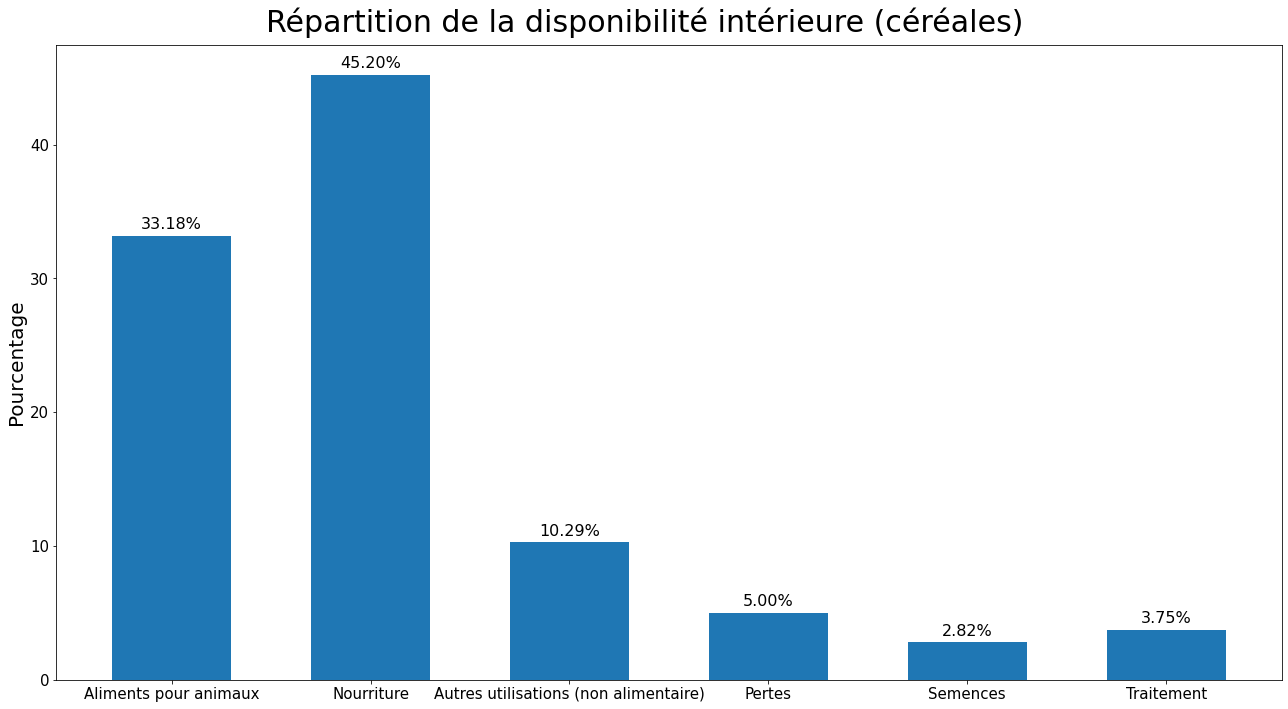

In [67]:
fig,ax=plt.subplots(figsize=(18,10))
ax.bar(etiquette,Liste,width=0.6)
plt.suptitle('Répartition de la disponibilité intérieure (céréales)',fontsize=30)
plt.ylabel('Pourcentage',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

for index,data in enumerate(Liste):
    plt.text(x=index , y =data+0.5 , s=f"{data:.2f}%" , fontdict=dict(fontsize=16),ha='center')
    plt.tight_layout()
plt.show()

# Recherche des pays ayant reçu le plus d'aide alimentaire

In [68]:
aalimpp=aalim.groupby(['Pays bénéficiaire']).sum().drop(columns=['Année'])

In [69]:
aalimpp.sort_values(by=['Valeur'],ascending=False).head(10).drop(columns=['Valeur']).reset_index()

,Pays bénéficiaire
0,République arabe syrienne
1,Éthiopie
2,Yémen
3,Soudan du Sud
4,Soudan
5,Kenya
6,Bangladesh
7,Somalie
8,République démocratique du Congo
9,Niger


Voici les 10 pays ayant reçu le plus d'aide alimentaire depuis 2013

# Recherche de la particularité de la Thaïlande avec le manioc

In [70]:
sous_nutr[sous_nutr['Pays']=='Thaïlande']

,Pays,Année,Popsn,Pop,Propsn en %
167,Thaïlande,2017,6.2,69209.81,8.958268


In [71]:
manioc=da[(da['Produit']=='Manioc')& (da['Zone']=='Thaïlande')]

In [72]:
(manioc.iloc[0,10]/manioc.iloc[0,14])*100

83.41272991928014

83 % de la production de manioc est exporté alors qu'il y a 9 % de la population en sous-nutrition.

# Recherche de la particularité de l'Indonésie avec l'huile de palme

In [73]:
sous_nutr[sous_nutr['Pays']=='Indonésie']

,Pays,Année,Popsn,Pop,Propsn en %
75,Indonésie,2017,23.6,264650.963,8.917406


In [74]:
huiledepalme=da[(da['Produit']=='Huile de Palme')& (da['Zone']=='Indonésie')]

In [75]:
(huiledepalme.iloc[0,10]/huiledepalme.iloc[0,14])*100

86.7526769779893

87 % de la production de l'huile de palme est exporté alors qu'il y a  9% de la population en sous-nutrition.

# Recherche des 10 produits les plus exportés et 10 produits les plus importés des pays sous alimentés.

In [76]:
export_ss_alim=da.merge(sn2017,left_on='Zone',right_on='Zone').groupby(['Produit']).sum().sort_values(by=['Exportations - Quantité'],ascending=False)

In [77]:
export_ss_alim.drop(columns=['Aliments pour animaux','Autres Utilisations' ,'Disponibilité alimentaire (Kcal/personne/jour)' ,'Disponibilité alimentaire en quantité (kg/personne/an)','Disponibilité de matière grasse en quantité (g/personne/jour)','Disponibilité de protéines en quantité (g/personne/jour)','Disponibilité intérieure','Exportations - Quantité','Importations - Quantité','Nourriture','Pertes','Production','Semences','Traitement', 'Variation de stock']).iloc[0:10].reset_index()

,Produit
0,Blé
1,Maïs
2,Lait - Excl Beurre
3,Soja
4,Sucre Eq Brut
5,Huile de Palme
6,"Légumes, Autres"
7,Riz (Eq Blanchi)
8,Orge
9,"Oranges, Mandarines"


Les 10 produits les plus exportés par les pays sous-alimentés.

In [78]:
importa_ss_alim=da.merge(sn2017,left_on='Zone',right_on='Zone').groupby(['Produit']).sum().sort_values(by=['Importations - Quantité'],ascending=False)

In [79]:
importa_ss_alim.drop(columns=['Aliments pour animaux','Autres Utilisations' ,'Disponibilité alimentaire (Kcal/personne/jour)' ,'Disponibilité alimentaire en quantité (kg/personne/an)','Disponibilité de matière grasse en quantité (g/personne/jour)','Disponibilité de protéines en quantité (g/personne/jour)','Disponibilité intérieure','Exportations - Quantité','Importations - Quantité','Nourriture','Pertes','Production','Semences','Traitement', 'Variation de stock']).iloc[0:10].reset_index()

,Produit
0,Blé
1,Maïs
2,Lait - Excl Beurre
3,Soja
4,Sucre Eq Brut
5,Huile de Palme
6,"Légumes, Autres"
7,Manioc
8,Orge
9,Riz (Eq Blanchi)


Les 10 produits les plus importés par les pays sous-alimentés.

# Recherche de la population qu'on pourrait nourrir avec la disponibilité alimentaire

In [80]:
dap=da.groupby(['Produit']).sum()

In [81]:
dap1=dap['Disponibilité alimentaire (Kcal/personne/jour)']*365/dap['Disponibilité alimentaire en quantité (kg/personne/an)']

In [82]:
dap2=pd.concat([dap,dap1],axis=1)

In [83]:
dap2.rename(columns={0 : 'ratio_kcal_kg'},inplace=True)

In [84]:
dap3=dap2[["ratio_kcal_kg"]].sort_values(by="ratio_kcal_kg", ascending=False)

In [85]:
dap3=dap3.drop(dap3.index[0],0)

In [86]:
dap3=dap3.reset_index()

In [87]:
dap3.head(10)

,Produit,ratio_kcal_kg
0,Huiles de Poissons,8972.553699
1,Huile de Sésame,8895.364238
2,Huiles de Foie de Poisso,8864.285714
3,Huile de Tournesol,8832.253532
4,Huile de Coco,8826.346928
5,Huile d'Arachide,8824.504863
6,Huile d'Olive,8818.437019
7,Graines Colza/Moutarde,8796.500000
8,Huile de Germe de Maïs,8796.044326
9,Huile de Palme,8791.075429


In [88]:
dap4=dap['Disponibilité de protéines en quantité (g/personne/jour)']*365*0.001/dap['Disponibilité alimentaire en quantité (kg/personne/an)']

In [89]:
dap5=pd.concat([dap,dap4],axis=1)

In [90]:
dap5.rename(columns={0 : 'ratio_protéines'},inplace=True)

In [91]:
dap6=dap5[["ratio_protéines"]].sort_values(by="ratio_protéines", ascending=False)

In [92]:
dap6=dap6.drop(dap6.index[0],0)

In [93]:
dap6=dap6.reset_index()

In [94]:
dap6.head(10)

,Produit,ratio_protéines
0,Soja,0.315011
1,Arachides Decortiquees,0.241687
2,Pois,0.223849
3,Légumineuses Autres,0.219352
4,Haricots,0.217877
5,Sésame,0.178287
6,Abats Comestible,0.177614
7,"Viande, Autre",0.175529
8,"Plantes Oleiferes, Autre",0.174664
9,Aliments pour enfants,0.152186


In [95]:
(dap2['Disponibilité intérieure']*1000*1000*dap2['ratio_kcal_kg']).sum()

1.5409519616286186e+16

La disponibilité intérieure mondiale est de 1.54e+16 kcal.


In [96]:
(dap5['Disponibilité intérieure']*dap5['ratio_protéines']).sum()

437395.1325962672

La disponibilité intérieure mondiale est de 437395.1 milliers de Tonnes de protéines.

In [97]:
(dap5['Disponibilité intérieure']*dap5['ratio_protéines']).sum()*1000*1000*1000/(60*365) #60g de protéines pour un humain en moyenne par jour

19972380483.847816

In [98]:
(dap2['Disponibilité intérieure']*1000*1000*dap2['ratio_kcal_kg']).sum()/(2300*365) #2300 kcal pour un humain en moyenne par jour

18355592157.57735

Si toute la disponibilité intérieure animale et végétale de 2017 était destinée à l'alimentation humaine :
   - l'équivalent en calories permettrait de nourrir 18.4 milliards de personnes.
   - l'équivalent en protéines permettrait de nourrir 20.0 milliards de personnes.


In [99]:
((dap5['Nourriture']*dap5['ratio_protéines']).sum()*1000*1000*1000/(60*365)
+(dap5['Aliments pour animaux']*dap5['ratio_protéines']).sum()*1000*1000*1000/(60*365)
+(dap5['Pertes']*dap5['ratio_protéines']).sum()*1000*1000*1000/(60*365))

13866693387.934536

In [100]:
((dap2['Nourriture']*1000*1000*dap2['ratio_kcal_kg']).sum()/(2300*365)
 +(dap2['Aliments pour animaux']*1000*1000*dap2['ratio_kcal_kg']).sum()/(2300*365)
 +(dap2['Pertes']*1000*1000*dap2['ratio_kcal_kg']).sum()/(2300*365))

12873275519.055834

Si toute la production animale et végétale de 2017 vouée à l'alimentation (humaines et animales + pertes) était destinée à l'alimentation humaine :
   - l'équivalent en calories permettrait de nourrir 12.9 milliards de personnes.
   - l'équivalent en protéines permettrait de nourrir 13.9 milliards de personnes.



In [101]:
(dap2['Nourriture']*1000*1000*dap2['ratio_kcal_kg']).sum()/(2300*365)

8596888013.28631

In [102]:
(dap5['Nourriture']*dap5['ratio_protéines']).sum()*1000*1000*1000/(60*365)

9292952672.782799

Concernant la nourriture disponible à l'alimentation humaine en 2017 :
   - l'équivalent en calories permettrait de nourrir 8.6 milliards de personnes.
   - l'équivalent en protéines permettrait de nourrir 9.3 milliards de personnes.




In [103]:
dap10=da.groupby(['Origine','Produit']).sum().reset_index()

In [104]:
dap11=dap10['Disponibilité alimentaire (Kcal/personne/jour)']*365/dap10['Disponibilité alimentaire en quantité (kg/personne/an)']

In [105]:
dap12=pd.concat([dap10,dap11],axis=1)

In [106]:
dap12.rename(columns={0:'ratio_kcal_kg'},inplace=True)

In [107]:
dap13=dap10['Disponibilité de protéines en quantité (g/personne/jour)']*365*0.001/dap10['Disponibilité alimentaire en quantité (kg/personne/an)']

In [108]:
dap14=pd.concat([dap12,dap13],axis=1)

In [109]:
dap14.rename(columns={0:'ratio_protéines'},inplace=True)

In [110]:
dap14=dap14[dap14['Origine']=='vegetale']

In [111]:
(dap14['Disponibilité intérieure']*1000*1000*dap14['ratio_kcal_kg']).sum()

1.3964651377989772e+16

In [112]:
(dap14['Disponibilité intérieure']*dap14['ratio_protéines']).sum()

347138.6929581549

La disponibilité intérieure est de 1.40e+16 kcal avec le végétale.

La disponibilité intérieure est de 347138.7 milliers de Tonnes de protéines avec le végétale.

In [113]:
(dap14['Disponibilité intérieure']*dap14['ratio_protéines']).sum()*1000*1000*1000/(60*365)

15851081870.235386

In [114]:
(dap14['Disponibilité intérieure']*1000*1000*dap14['ratio_kcal_kg']).sum()/(2300*365)

16634486453.82939

Si toute la disponibilité intérieure végétale de 2017 était destinée à l'alimentation humaine :
   - l'équivalent en calories permettrait de nourrir 16.6 milliards de personnes.
   - l'équivalent en protéines permettrait de nourrir 15.9 milliards de personnes.

In [115]:
((dap14['Aliments pour animaux']*dap14['ratio_protéines']).sum()*1000*1000*1000/(60*365)
+(dap14['Pertes']*dap14['ratio_protéines']).sum()*1000*1000*1000/(60*365)
+(dap14['Nourriture']*dap14['ratio_protéines']).sum()*1000*1000*1000/(60*365))

9856086312.01566

In [116]:
((dap14['Aliments pour animaux']*1000*1000*dap14['ratio_kcal_kg']).sum()/(2300*365)
+(dap14['Nourriture']*1000*1000*dap14['ratio_kcal_kg']).sum()/(2300*365)
+(dap14['Pertes']*1000*1000*dap14['ratio_kcal_kg']).sum()/(2300*365))

11284564945.906628

Si toute la production végétale de 2017 vouée à l'alimentation (humaines et animales + pertes) était destinée à l'alimentation humaine :
   - l'équivalent en calories permettrait de nourrir 11.3 milliards de personnes.
   - l'équivalent en protéines permettrait de nourrir 9.9 milliards de personnes.

In [117]:
(dap14['Nourriture']*dap14['ratio_protéines']).sum()*1000*1000*1000/(60*365)

5591029765.471478

In [118]:
(dap14['Nourriture']*1000*1000*dap14['ratio_kcal_kg']).sum()/(2300*365)

7126936675.09793

Concernant la nourriture disponible à l'alimentation humaine avec le végétale en 2017 :

   - l'équivalent en calories permettrait de nourrir 7.1 milliards de personnes.
   - l'équivalent en protéines permettrait de nourrir 5.6 milliards de personnes.



# Recherche de la population humaine qu'on pourrait nourrir avec les céréales et recherche de la proportion de chaque type de céréales destinée à l'alimentation humaine

In [119]:
cereales2=cereales.drop(columns='Année')

In [120]:
cereales2[cereales2['Élément']=='Aliments pour animaux'].sum().Valeur

945984.0

En 2017 , l'élevage a consommé 945984 milliers de tonnes de céréales.

In [121]:
cereales2[cereales2['Élément']=='Nourriture'].sum().Valeur

1288926.0

En 2017 , l'humain a consommé 1288926 milliers de tonnes de céréales.

In [122]:
cereales2[cereales2['Élément']=='Aliments pour animaux'].sum().Valeur+cereales2[cereales2['Élément']=='Nourriture'].sum().Valeur

2234910.0

En 2017 , l'humain et l'élevage ont consommé 2234910 milliers de tonnes de céreales.

In [123]:
liste1=['Avoine','Blé et produits','Céréales, Autres','Maïs et produits','Millet et produits','Orge et produits','Riz et produits','Seigle et produits','Sorgho et produits']


In [124]:
for d in liste1:
     print('%s: %f' %(d,cereales2[(cereales2['Produit']== d) & (cereales2['Élément']=='Nourriture')].sum().Valeur/(cereales2[(cereales2['Produit']== d) & (cereales2['Élément']=='Aliments pour animaux')].sum().Valeur+cereales2[(cereales2['Produit']== d) & (cereales2['Élément']=='Nourriture')].sum().Valeur)*100)+'%')

Avoine: 21.969594%
Blé et produits: 79.599640%
Céréales, Autres: 25.707763%
Maïs et produits: 18.407738%
Millet et produits: 86.210667%
Orge et produits: 8.420327%
Riz et produits: 92.994416%
Seigle et produits: 41.122494%
Sorgho et produits: 55.056318%


- Proportion de Mais déstinée à l'alimentation humaine : 18%


- Proportion d'Orge déstinée à l'alimentation humaine : 8%


- Proportion d'Avoine déstinée à l'alimentation humaine : 22%


- Proportion de Céréales,Autres déstinée à l'alimentation humaine : 26%


- Proportion de Seigle déstinée à l'alimentation humaine : 41%


- Proportion de Sorgho déstinée à l'alimentation humaine : 55%


- Proportion de Blé déstinée à l'alimentation humaine : 80%


- Proportion de Millet déstinée à l'alimentation humaine : 86%


- Proportion de Riz déstinée à l'alimentation humaine : 93%


Le Sorgho , le Blé , le Millet et le Riz sont majoritairement utilisé pour l'alimentation humaine.

In [125]:
cereales2

,Domaine,Zone,Élément,Produit,Unité,Valeur
0,Bilans Alimentaires (2014-),Afghanistan,Production,Blé et produits,Milliers de tonnes,4281.00
1,Bilans Alimentaires (2014-),Afghanistan,Importations - Quantité,Blé et produits,Milliers de tonnes,3080.00
2,Bilans Alimentaires (2014-),Afghanistan,Variation de stock,Blé et produits,Milliers de tonnes,32.00
3,Bilans Alimentaires (2014-),Afghanistan,Exportations - Quantité,Blé et produits,Milliers de tonnes,2.00
4,Bilans Alimentaires (2014-),Afghanistan,Disponibilité intérieure,Blé et produits,Milliers de tonnes,7326.00
...,...,...,...,...,...,...
19513,Bilans Alimentaires (2014-),Zimbabwe,Nourriture,"Céréales, Autres",Milliers de tonnes,3.00
19514,Bilans Alimentaires (2014-),Zimbabwe,Disponibilité alimentaire en quantité (kg/personne/an),"Céréales, Autres",kg,0.20
19515,Bilans Alimentaires (2014-),Zimbabwe,Disponibilité alimentaire (Kcal/personne/jour),"Céréales, Autres",Kcal/personne/jour,2.00
19516,Bilans Alimentaires (2014-),Zimbabwe,Disponibilité de protéines en quantité (g/personne/jour),"Céréales, Autres",g/personne/jour,0.05


In [126]:
cereales4=cereales2.groupby(['Produit']).sum()

In [127]:
cereales4=cereales4.reset_index()

In [128]:
cereales4=cereales4['Produit'].replace(['Blé et produits','Maïs et produits','Millet et produits','Orge et produits','Riz et produits','Seigle et produits','Sorgho et produits'],['Blé','Maïs','Millet','Orge','Riz (Eq Blanchi)','Seigle','Sorgho'])

In [129]:
cereales5=dap14.merge(cereales4,left_on='Produit',right_on='Produit')

In [130]:
(cereales5['Disponibilité intérieure']*1000*1000*cereales5['ratio_kcal_kg']).sum()/(2300*365)

8749789646.200575

In [131]:
(cereales5['Disponibilité intérieure']*cereales5['ratio_protéines']).sum()*1000*1000*1000/(60*365)

8451587756.059581

Si toute la production de céréales de 2017 était destinée à l'alimentation humaine :

   - l'équivalent en calories permettrait de nourrir 8.7 milliards de personnes.
   - l'équivalent en protéines permettrait de nourrir 8.5 milliards de personnes.

In [132]:
((cereales5['Aliments pour animaux']*1000*1000*cereales5['ratio_kcal_kg']).sum()/(2300*365)
+(cereales5['Nourriture']*1000*1000*cereales5['ratio_kcal_kg']).sum()/(2300*365)
+(cereales5['Pertes']*1000*1000*cereales5['ratio_kcal_kg']).sum()/(2300*365))

7323804867.101939

In [133]:
((cereales5['Aliments pour animaux']*cereales5['ratio_protéines']).sum()*1000*1000*1000/(60*365)
+(cereales5['Nourriture']*cereales5['ratio_protéines']).sum()*1000*1000*1000/(60*365)
+(cereales5['Pertes']*cereales5['ratio_protéines']).sum()*1000*1000*1000/(60*365))

7060889612.340363

Si toute la production de céréales de 2017 vouée à l'alimentation (Nourriture + Aliments pour animaux + Pertes) était destinée à l'alimentation humaine :

   - l'équivalent en calories permettrait de nourrir 7.3 milliards de personnes.
   - l'équivalent en protéines permettrait de nourrir 7.1 milliards de personnes.



In [134]:
(cereales5['Nourriture']*1000*1000*cereales5['ratio_kcal_kg']).sum()/(2300*365)

3850531055.309389

In [135]:
(cereales5['Nourriture']*cereales5['ratio_protéines']).sum()*1000*1000*1000/(60*365)

3615729174.2895284

Concernant la nourriture disponible à l'alimentation humaine avec les céréales en 2017 :

   - l'équivalent en calories permettrait de nourrir 3.9 milliards de personnes.
   - l'équivalent en protéines permettrait de nourrir 3.6 milliards de personnes.

